In [1]:
import sys
import sklearn
import numpy as np
import os
import tarfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile
import urllib.request as url
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

<h1>DATA COLLECTION</h1>

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL =  DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
print(HOUSING_PATH)
print(HOUSING_URL)

datasets/housing
https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [4]:
def fetchHousingData(housingURL = HOUSING_URL, housingPath = HOUSING_PATH):
    if not os.path.isdir(housingPath):
        os.makedirs(housingPath)
    tgzPath = os.path.join(housingPath, "housing.tgz")
    url.urlretrieve(housingURL, tgzPath)
    housingTGZ = tarfile.open(tgzPath)
    housingTGZ.extractall(path=housingPath)
    housingTGZ.close()

In [5]:
def loadHousingData(housingPath = HOUSING_PATH):
    csvPath = os.path.join(housingPath, "housing.csv")
    return pd.read_csv(csvPath)

In [6]:
fetchHousingData()

In [7]:
housing = loadHousingData()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h1>DATA INVESTIGATION AND PRE-PROCESSING </h1>

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

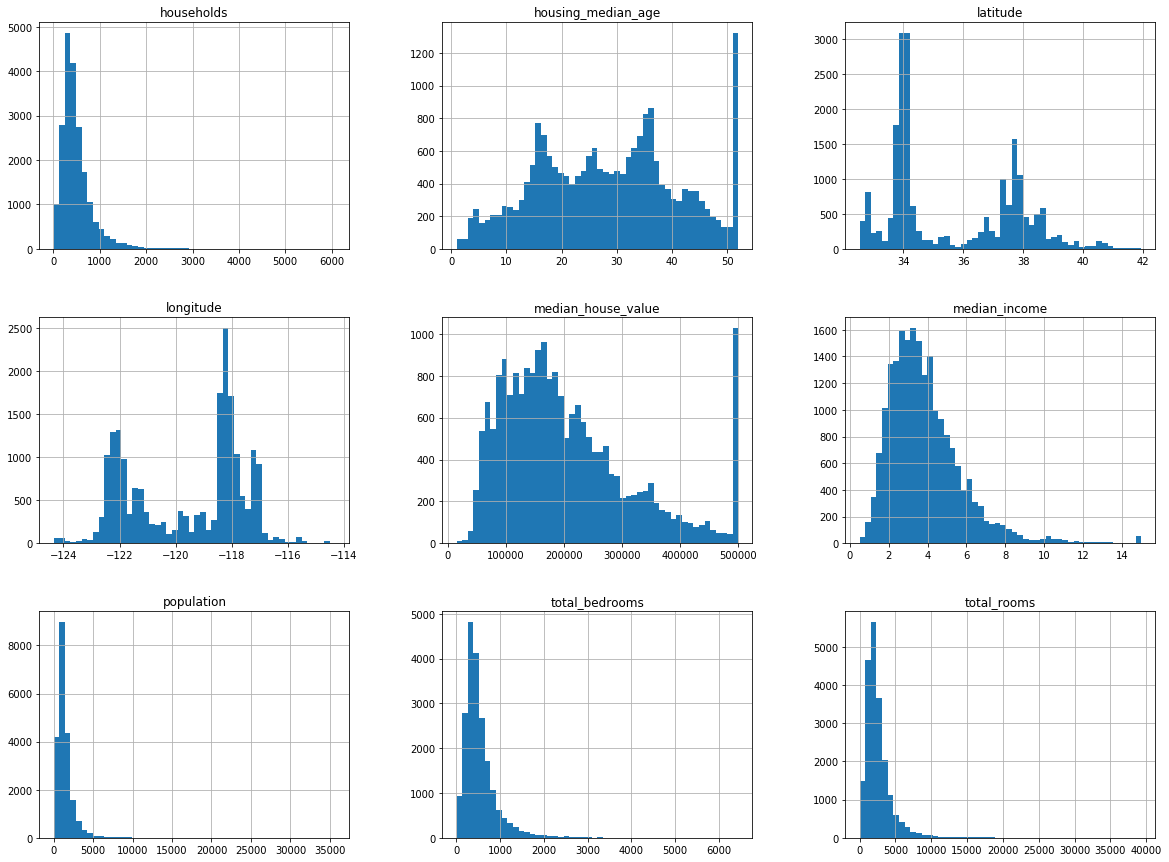

In [9]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
# bins will determine how many bars will be in the histogram.
# For each item, things will be clumped into a bin/category that is represented 
# as a bar which shows how many times that item pops up
plt.show()

<h3> Create a test set to validate assumptions and check algorithms to use </h3>
  </h3> We will use 20% of the dataset as a test set </h3>

In [10]:
trainSet, testSet = train_test_split(housing, test_size = 0.2, 
                                     random_state = 42)

<h1> Checking for representativeness of data </h1>

In [22]:
# You need to ensure that the test set is representative of
# the various categories of incomes in the whole dataset

In [11]:
# median income is a continuous numerical attribute
# because of this we can categorize the incomes in the area
# will use the pd.cut() function to categorize the icnome into 5 categories
# This function is also useful for going from a continuous variable to a categorical
# variable. For example, cut could convert ages to groups of age ranges.

housing["incomeCat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels =[1, 2, 3, 4, 5])

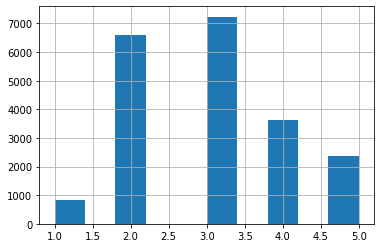

In [12]:
housing["incomeCat"].hist()

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incomeCat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [14]:
# Using StratifiedShuffle to check representation of the data
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for trainIndex, testIndex in split.split(housing, housing["incomeCat"]):
    stratTrainSet = housing.loc[trainIndex]
    stratTestSet = housing.loc[testIndex]

In [15]:
stratTrainSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incomeCat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [32]:
stratTestSet

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incomeCat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4


In [16]:
len(stratTestSet)

4128

In [18]:
stratTestSet["incomeCat"].value_counts()/len(stratTestSet)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: incomeCat, dtype: float64

<h2> From this we see that the data has enough examples of the representation of incomes</h2>
<h3> So lets drop the incomeCat column to take our data back to its original shape </h3>

In [19]:
for Set in (stratTrainSet, stratTestSet):
    Set.drop("incomeCat", axis = 1, inplace= True)

In [20]:
stratTrainSet
# observe that the incomeCat column was dropped

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


<h1> On to Data Visualization </h1>
<h3> Geographic Data </h3>

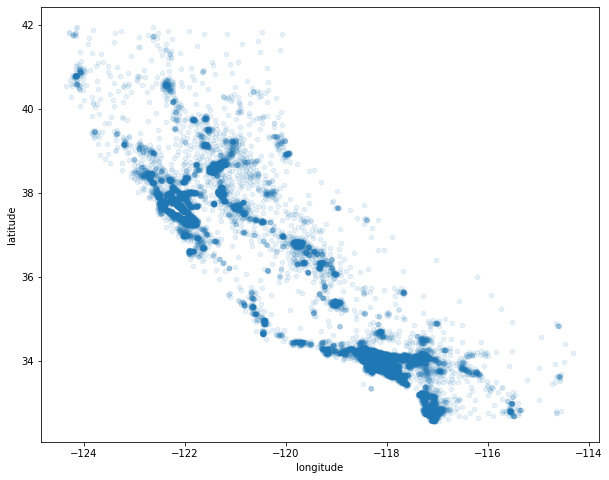

In [21]:
housing.plot(kind = "scatter",
            x = "longitude",
            y = "latitude",
            alpha = 0.1, #controls density of the dots. it goes from 0 to 1, the closer to 0, the more drastic the concentration shows
            figsize = (10, 8))

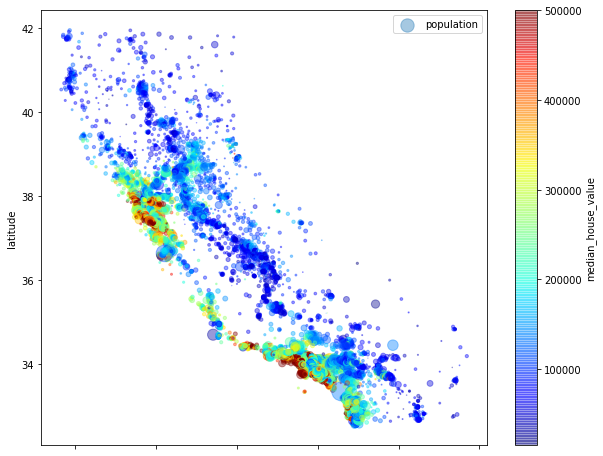

In [22]:
# s => option. The subset chosen to be represented was population. Will affect how big the dots are
# c => color. Which has been tied to price of the house. Red for highest, Blue smallest.
housing.plot(
            kind = "scatter",
            x = "longitude",
            y = "latitude",
            alpha = 0.4,
            s = housing["population"]/100, label = "population", figsize = (10,8),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
            )
plt.legend()

In [38]:
# for some reason, the latitude ticks wont show up

<h1> Looking for Correlations</h1>

In [44]:
# Lets get the column titles
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h3> The first way is to use the .corr() function </h3>

In [23]:
corrMatrix = housing.corr()

In [24]:
corrMatrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [25]:
corrMatrix["population"].sort_values(ascending = False)
#from this we can assume that as population inceases, so does num of households, bedrooms etc
# It is a positive correlation
# We havent tested for significance yet so this is all speculative atm

population            1.000000
households            0.907222
total_bedrooms        0.877747
total_rooms           0.857126
longitude             0.099773
median_income         0.004834
median_house_value   -0.024650
latitude             -0.108785
housing_median_age   -0.296244
Name: population, dtype: float64

In [45]:
corrMatrix["median_income"].sort_values(ascending = False)

median_income         1.000000
median_house_value    0.688075
total_rooms           0.198050
households            0.013033
population            0.004834
total_bedrooms       -0.007723
longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
Name: median_income, dtype: float64

<h3> Another way is to use the pandas scatter_matrix() function </h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd653764a10>,
      dtype=object)

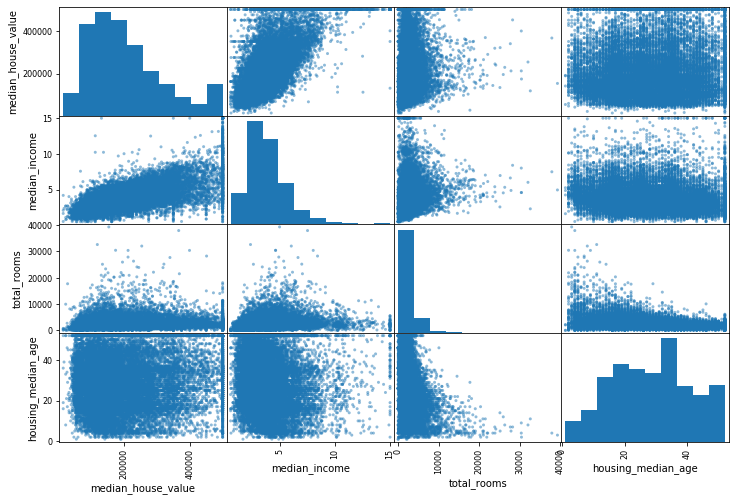

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))

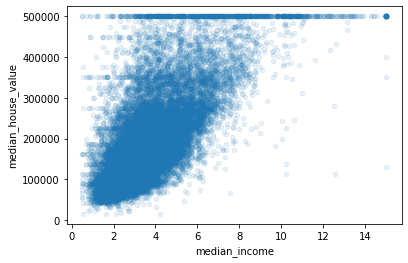

In [27]:
# the mdian_income has the most prospects of determining the median_house_value
# Thats because we see a positive correlation
# lets plot it

housing.plot(kind = "scatter",
             x = "median_income",
             y = "median_house_value",
             alpha = 0.1)

In [49]:
housing["roomsPerHousehold"] = housing["total_rooms"]/housing["households"]
housing["bedroomsPerRoom"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["populationPerHousehold"] = housing["population"]/housing["households"]

In [28]:
corrMatrix = housing.corr()
corrMatrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Revert to a clean training set

In [29]:
# We do this by copying stratTrainSet
housing = stratTrainSet.drop("median_house_value", axis = 1)
housingLabels = stratTrainSet["median_house_value"].copy()

<h1> Cleaning the Data </h1>

In [30]:
# Axis 0 will act on all the ROWS in each COLUMN
# Axis 1 will act on all the COLUMNS in each ROW
# Lets remove/replace missing values. We can do this with:
housing.dropna(subset = ["total_bedrooms"])
housing.drop("total_bedrooms", axis = 1) #gets rid of whole column
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace = True)

In [31]:
# we can also use the simpleImputer class to help us with missing values
imputer = SimpleImputer(strategy = "median")
# Can only be used with numerical data so we need to create a copy without
# ocean_proximity which is text
housingNumOnly = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housingNumOnly)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [32]:
imputer.statistics_
# this stores the median of each attribute

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
housingNumOnly.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
# We can use the trained imputer to replace missing values with the median

X = imputer.transform(housingNumOnly) # a numpy array
housingTransformed = pd.DataFrame(X, columns = housingNumOnly.columns)

In [35]:
housingTransformed.info()
# As seen, there are now no missing values
# as they were all replaced with the median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


<h1> Handling Text and Categorical Attributes </h1>
<h3> we will use SciKit learns OrdinalEncoder class </h3>
<h3> use this for TA CLASS </h3>

In [36]:
housingCat = housing[["ocean_proximity"]]

#  is text.
# seems like an ordinal categorical attribute because it connotes an order
# but really it is nominal since it represents group names
# ML algorithms liek to deal with numbers not text so we  will convert 
# the attributes into integers

In [37]:
housingCat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [38]:
ordinalEncoder = OrdinalEncoder()
housingCatEncoded = ordinalEncoder.fit_transform(housingCat)

In [39]:
housingCatEncoded[0:20]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [1.],
       [1.]])

In [40]:
housingCatEncoded[20000: 20010]

array([], shape=(0, 1), dtype=float64)

In [41]:
housingCat.describe()

,ocean_proximity
count,16512
unique,5
top,<1H OCEAN
freq,7276


In [42]:
# we can use the categories_ instance to get the list of categories
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# the challenge with this is that the ML algorithms will see  nearby values
# as similar (cat 0 being close to cat 1), which isnt the case 
# this would be good if the data was ordinal like (good, average, bad)
# so to combat this we use one hot encodings

<h1> Using One Hot Encodings for categories </h1>

In [43]:
catEncoder = OneHotEncoder()
housingCatHot = catEncoder.fit_transform(housingCat)
# the one hot encoder will put everything into a vector filled with 0's 
# whereby when it is the right category, a 1 will appear in the vector
# however this increases the size of the feature which increases training
# time

In [44]:
housingCatHot
# output is a SciPy sparse matrix, instead of a NumPy array. This is very
# useful when you have categorical attributes with thousands of categories

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
# convert it to a numpyarray
housingCatHot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [46]:
# can get the categories with the categories variable/method
catEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<h2> Using Custom Transformers </h2> 

## All you really need to do is create a class and implement 3 methods 
##### 1. fit() ==> for this return self
##### 2. transform()
##### 3. fit_transform()

In [ ]:
# You can also get fit_transform() by adding 
# TransformerMixin as a base class

### If you also add BaseEstimator as a base class(without arguments) you will get 2 methods:

##### (get_params() and set_params())

##### you can use these for hyperparameter turning

In [ ]:
# example using from sklearn.base import BaseEstimator, TransformerMixin
# lets get the extra attrubutes roomsPerHouehold and populationPerHousehold

In [47]:
roomsIX, bedroomsIX, populationIX, householdsIX = 3, 4, 5, 6

class combinedAttributesAdder(BaseEstimator,  TransformerMixin):
    def __init__(self, addBedroomsPerRoom = True):
        self.addBedroomsPerRoom = addBedroomsPerRoom
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y= None):
#         X[:, roomsIX] will create a slice of the df with only the rooms column
        roomsPerHouehold = X[:, roomsIX]/X[:, householdsIX]
        populationPerHousehold = X[:, populationIX]/X[:, householdsIX]
        if self.addBedroomsPerRoom:
            bedroomsPerRoom = X[:, bedroomsIX]/ X[:, householdsIX]
            return np.c_[X, roomsPerHouehold, populationPerHousehold,
                         bedroomsPerRoom ]
        else:
            return np.c_[X, roomsPerHouehold, populationPerHousehold]

In [48]:
roomsIX, bedroomsIX, populationIX, householdsIX = 3, 4, 5, 6

# This hyperparameter(addBedroomsPerRoom) will allow you to easily 
# find out whether adding this attribute helps the
# Machine Learning algorithms or not.

# The more you automate these data preparation steps, the more
# combinations you can automatically try out, making it much more 
# likely that you will find a great combination (and saving you a lot
# of time).

In [49]:
attributeAdder = combinedAttributesAdder(addBedroomsPerRoom = False)
housingExtraAttribs = attributeAdder.transform(housing.values)

In [50]:
housingExtraAttribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

## Feature Scaling

In [ ]:
# As with all the transformations, it is important to fit the scalers to
# the training data only, not to the full dataset (including the test set).

In [ ]:
# With few exceptions, Machine Learning algorithms don’t perform well
# when the input numerical attributes have very different scales.

### There are 2 ways to get all attributes to have the same scale

##### => min-max scaling/normalization and standardization

### Min-Max Scaling

In [51]:
# values are shifted and rescaled so that they range from 0 to 1
# we do this by subtracting values from the min value and dividing 
# by the max minus the min

# i.e newValue = (value - min)/(max-min)


# Sci-kit learn provides us with the MinMaxScaler for this . We can also 
# use the feature_range hyperameter Incase we dont want a (0-1) range.
from sklearn.preprocessing import MinMaxScaler

### Standardization

In [ ]:
# it subtracts the mean value (so standardized
# values always have a zero mean), and then it divides
# by the standard deviation so that the resulting distribution
# has unit variance.

In [ ]:
# Unlike min-max scaling, standardization doesnt bound values to a specific
# range which may be a problem for some algorithms like neural networks
# which expect input values ranging from 0-1

In [ ]:
# It is less affected by outliers though

In [52]:
# SciKit learn provides us with a transformer called StandardScaler
# for standardization
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Transformation Pipelines

In [119]:
# Pipelines help with sequencing these transformations
# A pipeline for numerical attributes
# The Pipeline constructor takes a list of name/estimator
# pairs defining a sequence of steps.
# The names can be anything you want 
# The last estimator must be transformers i.e they must have a fit_transform()
# method

# When you call the pipelines fit() method, it calls fit_transform on all
# transformers in order/sequentially


# you can also pass custom transformers so long as you create the class with 
# the three methods

In [53]:
numPipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("attributeAdder", combinedAttributesAdder()),
    ("standardScaler", StandardScaler()),
                ])

In [54]:
housingNumTransformed = numPipeline.fit_transform(housingNumOnly)

In [121]:
# Lets make a single transformer that will be able to handle all the columns
# It will apply the appropriate transformations to each column

# The constructor requires a list of tuples, where each tuple contains a 
# name22, a transformer and a list of names (or indices) of columns that 
# the transformer should be applied to.

In [55]:
from sklearn.compose import ColumnTransformer

numAttribs = list(housingNumOnly)
catAttribs = ["ocean_proximity"]

fullPipeline = ColumnTransformer([
    ("num", numPipeline, numAttribs),
    ("cat", OneHotEncoder(), catAttribs),
])

housingPrepared = fullPipeline.fit_transform(housing)

In [56]:
len(housingPrepared)

16512

In [57]:
list(housingNumOnly)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

housingLabels

In [66]:
housingPrepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
       -0.1215581 ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

## Selecting and Training a Model

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linReg = LinearRegression()
linReg.fit(housingPrepared, housingLabels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
someData = housing.iloc[:5]
someLabels = housingLabels.iloc[:5]
someDataPrepared = fullPipeline.transform(someData)
print("Predictions:", linReg.predict(someDataPrepared))

Predictions: [211881.21811279 321219.24211009 210877.63065012  62198.25451316
 194847.8414579 ]


In [62]:
print("Labels:", list(someLabels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [69]:
# calulate the error
from sklearn.metrics import mean_squared_error

In [70]:
housingPredictions = linReg.predict(housingPrepared)

In [71]:
linMSE = mean_squared_error(housingLabels, housingPredictions)
linMSE = np.sqrt(linMSE)
linMSE


68911.49637588045

In [72]:
# This is an average error of 68911$ per predicition. Which is trash concidering 
# that our median_housing_values range from $120,000 and $265,000

## Lets use another Model then. A Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor()
treeReg.fit(housingPrepared, housingLabels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
housingPredictions = treeReg.predict(housingPrepared)
# calculate the error
linMSE = mean_squared_error(housingLabels, housingPredictions)
linMSE = np.sqrt(linMSE)
linMSE

0.0

In [77]:
# As good as this model's error rate seems, it is more likely overfitting our data
# We do not want our model to touch the test set until we are ready to launch the model
# Soooo, to check this assumption, we will use .....

## CROSS-VALIDATION

#### We should use the train_test_split function on the test set to 
#### divide it into a train  and validate set 


###### An alternative is to use the K-fold cross-validation feature

In [78]:
# The following
# code randomly splits the training set into 10 distinct subsets called folds, then it
# trains and evaluates the Decision Tree model 10 times, picking a different fold for
# evaluation every time and training on the other 9 folds. The result is an array containing
# the 10 evaluation scores:

In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeReg, housingPrepared, housingLabels,
                        scoring = "neg_mean_squared_error", cv = 10)
treeRmseScores = np.sqrt(-scores)

In [82]:
def displayScores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation :", scores.std())

In [83]:
displayScores(treeRmseScores)

Scores: [70735.21905706 70228.08354873 70231.21656134 73894.30919057
 69542.72465583 76712.6086154  72878.98997773 70283.45703861
 75852.83337249 68905.43256862]
Mean: 71926.48745863704
Standard Deviation : 2603.632419345639


In [84]:
# This is pretty bad. Pretty worse than the linear regression model.
# On avaerage, the mean error for the prediction was $71926  with an error of ± 2603
# Lets try using cross validation on the linear regression model

In [85]:
linScores = cross_val_score(linReg, housingPrepared, housingLabels,
                           scoring = "neg_mean_squared_error", cv = 10)

linRmseScores = np.sqrt(-linScores)

In [86]:
displayScores(linRmseScores)

Scores: [67474.11780426 67233.22466524 69301.86479972 74716.01783105
 68426.80214612 71609.98356263 65200.14338307 68687.78826919
 72262.43484426 68111.81213342]
Mean: 69302.41894389638
Standard Deviation : 2653.460699447052


In [ ]:
# This is better than the decision tree, but also isnt the best as well.
# From it we can see that the decision tree is overfitting the model
# Lets try using anotheer model...

## RANDOM FORESTS

In [ ]:
# This is an ensamble model i.e a combination of decision trees

In [88]:
from sklearn.ensemble import  RandomForestRegressor

In [89]:
forestReg = RandomForestRegressor()
forestReg.fit(housingPrepared, housingLabels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [90]:
newPredicitons = forestReg.predict(housingPrepared)

In [93]:
# Lets cross-validate this model

In [94]:
treeScores = cross_val_score(forestReg, housingPrepared, housingLabels,
                            scoring = "neg_mean_squared_error", cv = 10)

treeScores = np.sqrt(-linScores)

In [95]:
displayScores(treeScores)

Scores: [67474.11780426 67233.22466524 69301.86479972 74716.01783105
 68426.80214612 71609.98356263 65200.14338307 68687.78826919
 72262.43484426 68111.81213342]
Mean: 69302.41894389638
Standard Deviation : 2653.460699447052


## A problem with Cross-Validation
#### Basically it means you will have to train the model about 10 different times on the smaller sets of data which is a lot